#   E-Commerce Sales Analysis

Dataset: Superstore Sales Dataset (Kaggle)
This is a classic real-world dataset with sales, profit, region, products, discounts, and customers.



In [66]:
 #Importing all required libraries
import pandas as pd
import re
import matplotlib.pyplot as plt

 #Reading CSV file
df = pd.read_csv("Sample_Superstore.csv", encoding="latin1")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Data Cleaning Process

In [68]:
  #Standardizing Date
def standardize_date(x):
    if pd.isna(x):
        return x

    x = str(x).strip()

       #If already in DD-MM-YYYY → keep as it is
    if re.fullmatch(r"\d{2}-\d{2}-\d{4}", x):
        return x

        #Try parsing other date formats (like 6/16/2016)
    try:
        d = pd.to_datetime(x, dayfirst=False, errors="raise")
        return d.strftime("%d-%m-%Y")
    except:
        return x    
        #keep original if not a valid date

   #Apply to column Oder Date
df["Order Date"] = df["Order Date"].apply(standardize_date)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [69]:
   #Apply to column Ship date
df["Ship Date"] = df["Ship Date"].apply(standardize_date)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##  Exploratory Data Analysis

1.	Which product categories generate the most revenue?

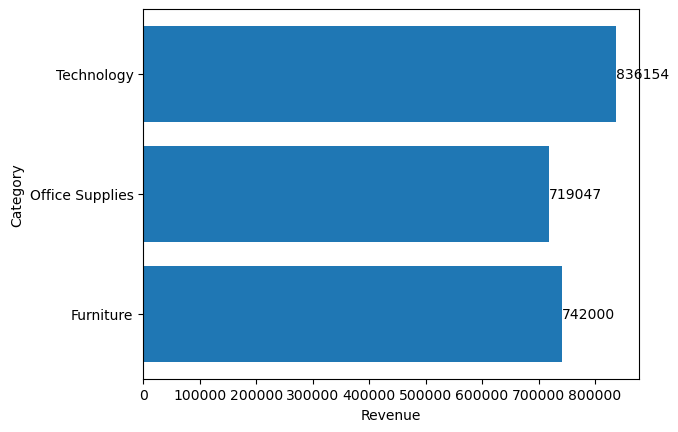

In [70]:
category_sales = df.groupby("Category")["Sales"].sum()
bars=plt.barh(category_sales.index, category_sales.values)
plt.bar_label(bars)
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()

1.1 Which product sub-categories generate the most revenue? (Comprehending)

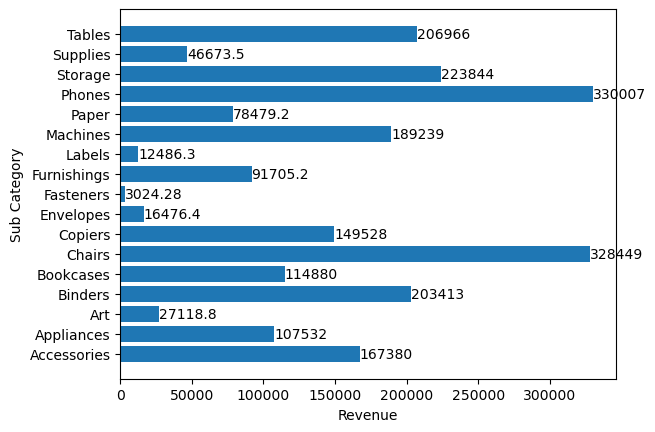

In [71]:
Subcategory_sales = df.groupby("Sub-Category")["Sales"].sum()
bars=plt.barh(Subcategory_sales.index, Subcategory_sales.values)
plt.bar_label(bars)
plt.xlabel('Revenue')
plt.ylabel('Sub Category')
plt.show()

2.	Which states/regions are most profitable and which are loss-making?

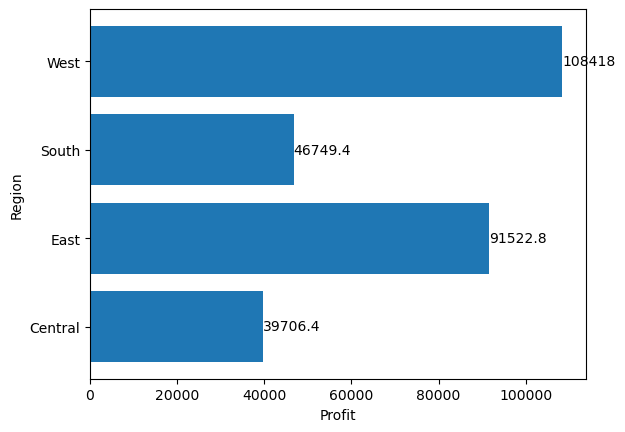

In [72]:
region_profit = df.groupby("Region")["Profit"].sum()
bars = plt.barh(region_profit.index, region_profit.values)
plt.bar_label(bars)
plt.xlabel('Profit')
plt.ylabel('Region')

plt.show()

2.1 Region wise profit margin?

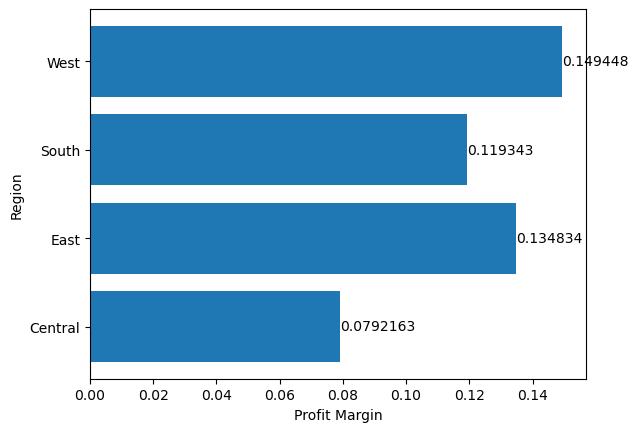

In [73]:
region_margin = (
    df.groupby("Region")[["Sales", "Profit"]]
      .sum()
      .assign(Profit_Margin=lambda x: x["Profit"] / x["Sales"])
)
bars = plt.barh(region_margin.index,
    region_margin["Profit_Margin"])
plt.bar_label(bars)
plt.xlabel('Profit Margin')
plt.ylabel('Region')

plt.show()

3.	Does discount rate affect profit negatively or positively?

  Discount_Band      Profit
0         0–10%   67.460503
1        10–20%   24.738824
2        20–30%  -45.679636
3          30%+ -107.209930


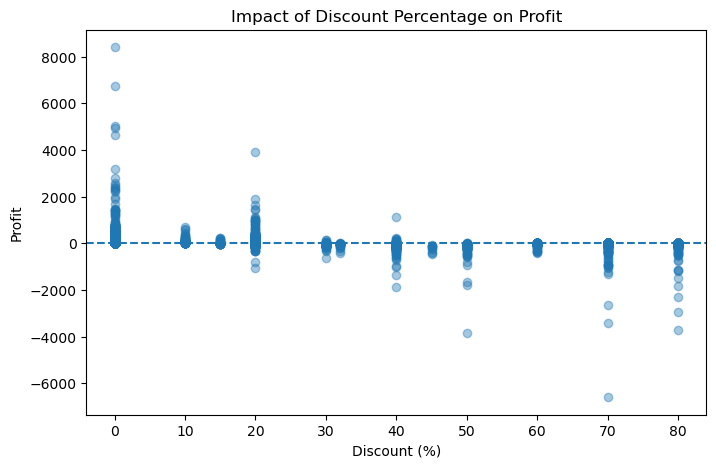

In [76]:
  # 1. Convert Discount to Percentage
df["Discount_Percent"] = df["Discount"] * 100

  # 2. Create discount bands in percentage
discount_bins = [0, 10, 20, 30, 100]
discount_labels = ["0–10%", "10–20%", "20–30%", "30%+"]

df["Discount_Band"] = pd.cut(
    df["Discount_Percent"],
    bins=discount_bins,
    labels=discount_labels,
    include_lowest=True
)

  # 3. Calculate average profit per discount band
discount_profit_summary = (
    df.groupby("Discount_Band", observed=True)["Profit"]
      .mean()
      .reset_index()
)

print(discount_profit_summary)

 # 4. Scatter plot: Discount % vs Profit
plt.figure(figsize=(8, 5))
plt.scatter(df["Discount_Percent"], df["Profit"], alpha=0.4)
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.title("Impact of Discount Percentage on Profit")
plt.axhline(0, linestyle="--")   # profit/loss reference
plt.show()



4.	What are the top 10 customers based on total sales?

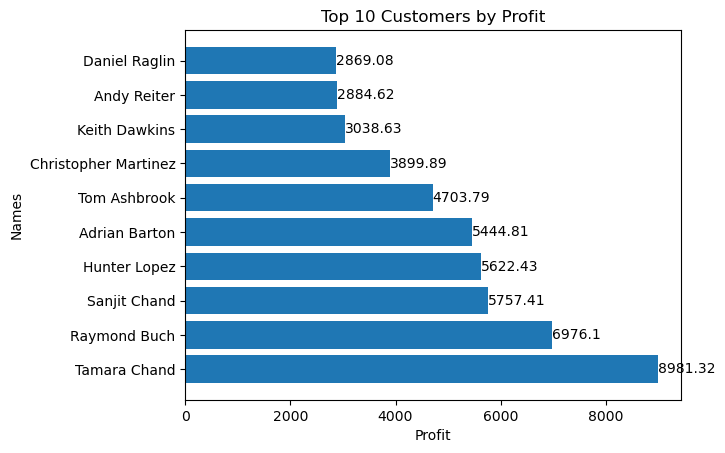

<Figure size 5000x600 with 0 Axes>

In [78]:
  # Example grouped data
region_profit = df.groupby("Customer Name")["Profit"].sum()

 # Sort and take top 10
top10 = region_profit.sort_values(ascending=False).head(10)

 # Plot bar chart
bars = plt.barh(top10.index, top10.values)

plt.bar_label(bars)
plt.ylabel("Names")
plt.xlabel("Profit")
plt.title("Top 10 Customers by Profit")
plt.figure(figsize=(50, 6))
plt.show()


4.1 Profit Margine per customer?

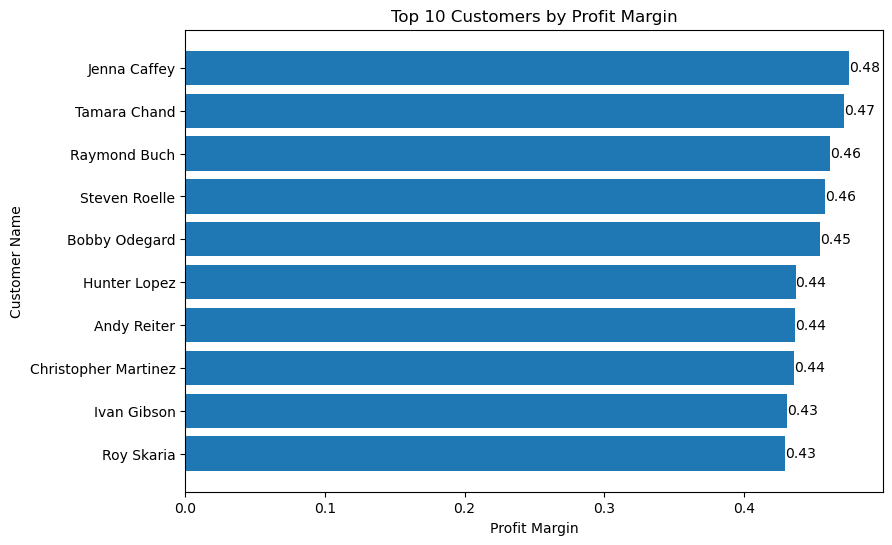

In [81]:
 # 1. Calculate profit margin per customer
profit_margin = (
    df.groupby("Customer Name")[["Sales", "Profit"]]
      .sum()
      .assign(Profit_Margin=lambda x: x["Profit"] / x["Sales"])
)

  #  2. Select top 10 customers by profit margin
top10 = (
    profit_margin
    .sort_values(by="Profit_Margin", ascending=False)
    .head(10)
)

  #  3. Horizontal bar chart
plt.figure(figsize=(9, 6))
bars = plt.barh(top10.index, top10["Profit_Margin"])
plt.bar_label(bars, fmt="%.2f")
plt.xlabel("Profit Margin")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by Profit Margin")
plt.gca().invert_yaxis()    #highest at top
plt.show()


Identifying Oldest Order date for further analysis

In [83]:
  #  Convert to datetime (DD-MM-YYYY)
def Convert_datetime() :
     return pd.to_datetime(df["Order Date"], format="%d-%m-%Y", errors="coerce")
df["Order Date"] = Convert_datetime()
  #  Find minimum (oldest) date
min_date = df["Order Date"].min()
min_date = pd.to_datetime(min_date)
min_date = min_date.strftime("%d-%m-%Y")
min_date


'02-01-2014'

Identifying Latest Order Date for further analysis

In [84]:
  #  Find Maximum (oldest) date
  #  Convert to datetime (DD-MM-YYYY)
df["Order Date"] =Convert_datetime()
max_date = df["Order Date"].max()
max_date = pd.to_datetime(max_date)
max_date = max_date.strftime("%d-%m-%Y")
max_date

'30-12-2017'

5.	Are there any seasonal trends in sales over months/quarters?

5.1 Monthly trend for 2014

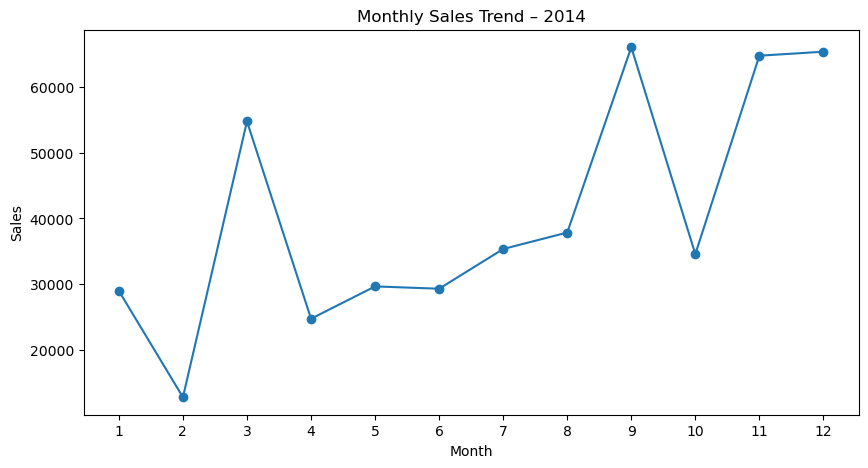

In [86]:
  #  Convert Order Date to datetime
df["Order Date"] = Convert_datetime()

  #  Filter data for year 2014
df_2014 = df[df["Order Date"].dt.year == 2014]

  #  Monthly sales aggregation
monthly_sales = (
    df_2014.groupby(df_2014["Order Date"].dt.month)["Sales"].sum()
)

  #  Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend – 2014")
plt.xticks(range(1, 13))     #Jan to Dec

plt.show()


5.2 Monthly Trend for 2015

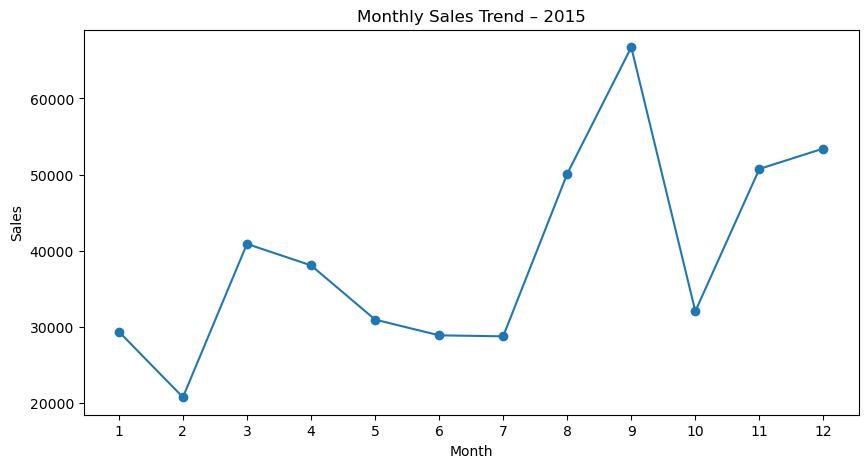

In [88]:
  #  Convert Order Date to datetime
df["Order Date"] = Convert_datetime()

  #  Filter data for year 2014
df_2015 = df[df["Order Date"].dt.year == 2015]

 #   Monthly sales aggregation
monthly_sales = (
    df_2015.groupby(df_2015["Order Date"].dt.month)["Sales"].sum()
)

 #   Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend – 2015")
plt.xticks(range(1, 13))     #Jan to Dec

plt.show()

5.3 Monthly Trend for 2016

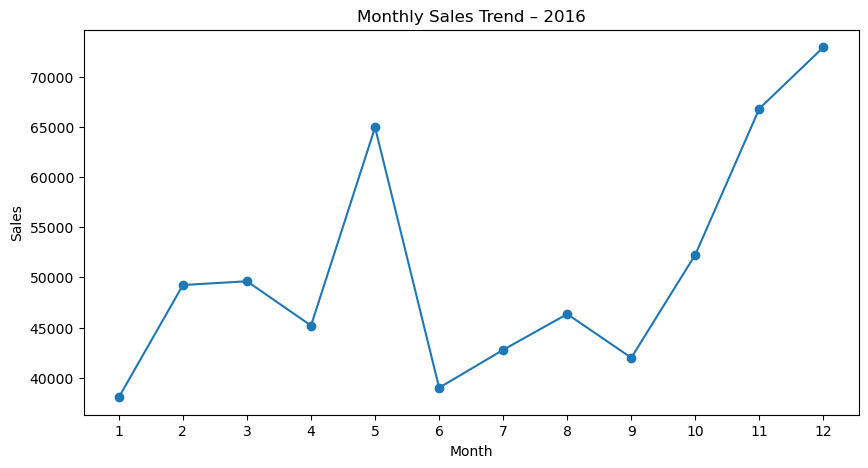

In [89]:
   # Convert Order Date to datetime
df["Order Date"] = Convert_datetime()

  #  Filter data for year 2014
df_2016 = df[df["Order Date"].dt.year == 2016]

  #  Monthly sales aggregation
monthly_sales = (
    df_2016.groupby(df_2016["Order Date"].dt.month)["Sales"].sum()
)

  #  Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend – 2016")
plt.xticks(range(1, 13))     #Jan to Dec

plt.show()

5.4 Monthly Trend for 2017

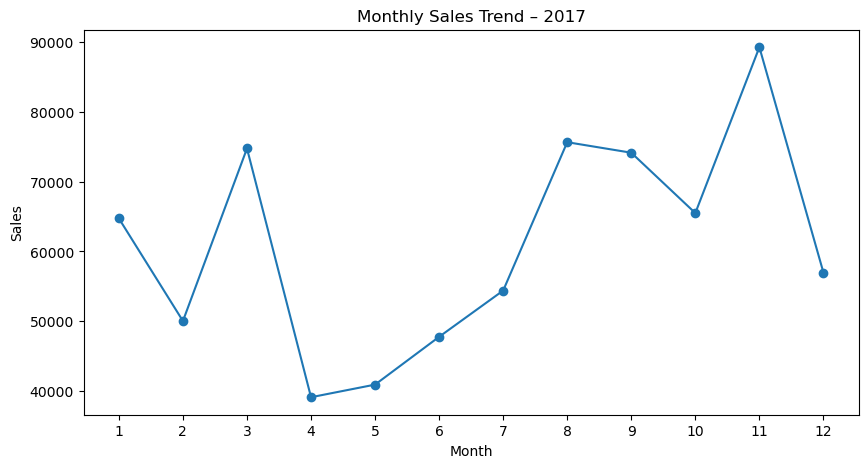

In [90]:
  #  Convert Order Date to datetime
df["Order Date"] = Convert_datetime()

  #  Filter data for year 2017
df_2017 = df[df["Order Date"].dt.year == 2017]

  #  Monthly sales aggregation
monthly_sales = (
    df_2017.groupby(df_2017["Order Date"].dt.month)["Sales"].sum()
)

  #  Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend – 2017")
plt.xticks(range(1, 13))     #Jan to Dec

plt.show()

Adding quarter column to Dataframe

In [91]:
df["Quarter"] = df["Order Date"].dt.to_period("Q")
df.groupby("Quarter")["Sales"].sum()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount_Percent,Discount_Band,Quarter
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.0,0–10%,2016Q3
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.0,0–10%,2016Q3
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.0,0–10%,2016Q4
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,45.0,30%+,2015Q4
4,5,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,20.0,10–20%,2015Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,20.0,10–20%,2014Q1
9990,9991,CA-2017-121258,2017-02-26,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,0.0,0–10%,2017Q1
9991,9992,CA-2017-121258,2017-02-26,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,20.0,10–20%,2017Q1
9992,9993,CA-2017-121258,2017-02-26,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,0.0,0–10%,2017Q1


5.a Quarterly Trend for 2014

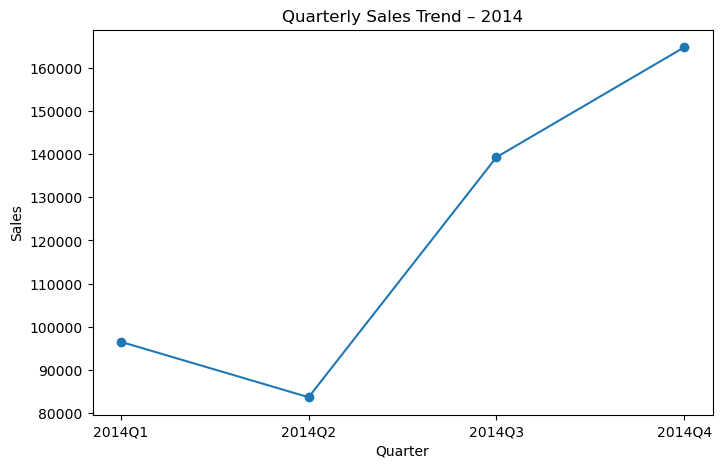

In [93]:
  #  Add Quarter column
df_2014.loc[:, "Quarter"] = df_2014["Order Date"].dt.to_period("Q")


  #  Quarterly sales aggregation
quarterly_sales = (
    df_2014.groupby("Quarter")["Sales"].sum()
)

  #  Plot
plt.figure(figsize=(8, 5))
plt.plot(
    quarterly_sales.index.astype(str),
    quarterly_sales.values,
    marker="o"
)

plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Quarterly Sales Trend – 2014")

plt.show()


5.b Quarterly Trend for 2015

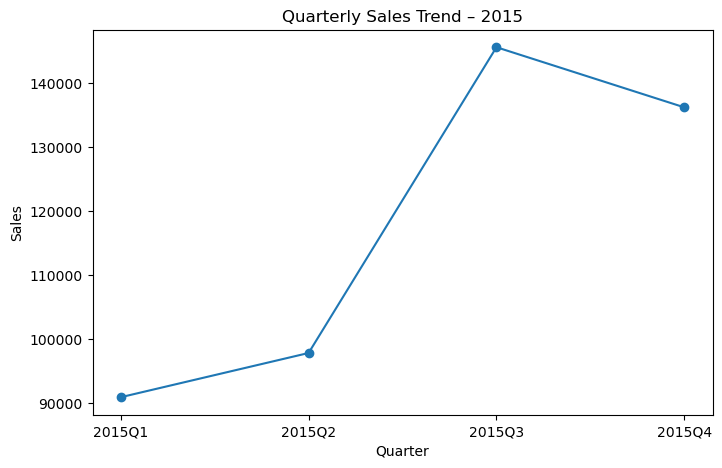

In [95]:
  #  Add Quarter column
df_2015.loc[:, "Quarter"] = df_2015["Order Date"].dt.to_period("Q")


 #   Quarterly sales aggregation
quarterly_sales_2015 = (
    df_2015.groupby("Quarter")["Sales"].sum()
)

 #   Plot
plt.figure(figsize=(8, 5))
plt.plot(
    quarterly_sales_2015.index.astype(str),
    quarterly_sales_2015.values,
    marker="o"
)

plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Quarterly Sales Trend – 2015")

plt.show()

5.c Quarterly Trend for 2016

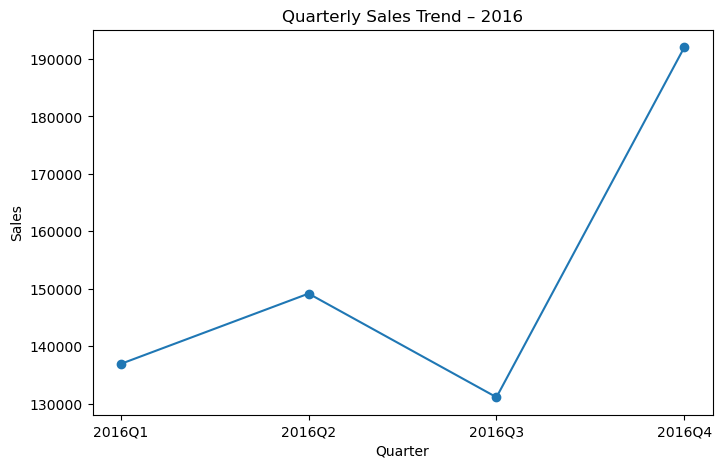

In [97]:
 #   Add Quarter column
df_2016.loc[:, "Quarter"] = df_2016["Order Date"].dt.to_period("Q")


  #  Quarterly sales aggregation
quarterly_sales_2016 = (
    df_2016.groupby("Quarter")["Sales"].sum()
)

 #   Plot
plt.figure(figsize=(8, 5))
plt.plot(
    quarterly_sales_2016.index.astype(str),
    quarterly_sales_2016.values,
    marker="o"
)

plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Quarterly Sales Trend – 2016")

plt.show()

5.d Quarterly Trend for 2017

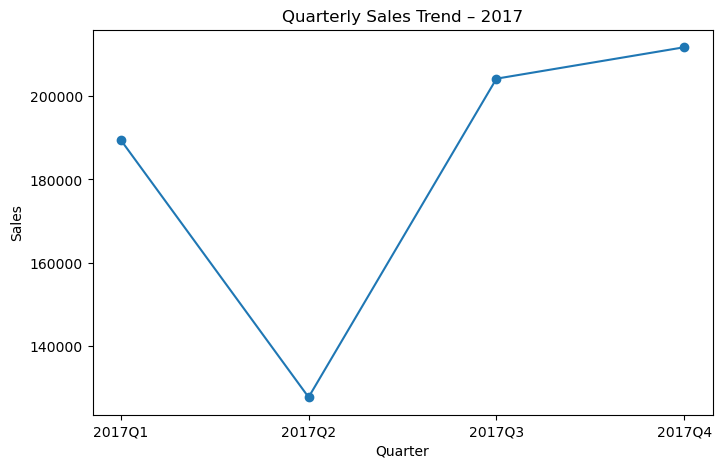

In [100]:
  #Add Quarter column
df_2017.loc[:, "Quarter"] = df_2017["Order Date"].dt.to_period("Q")


  #Quarterly sales aggregation
quarterly_sales_2017 = (
    df_2017.groupby("Quarter")["Sales"].sum()
)

  #Plot
plt.figure(figsize=(8, 5))
plt.plot(
    quarterly_sales_2017.index.astype(str),
    quarterly_sales_2017.values,
    marker="o"
)

plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Quarterly Sales Trend – 2017")

plt.show()

Yearly Sales Trend

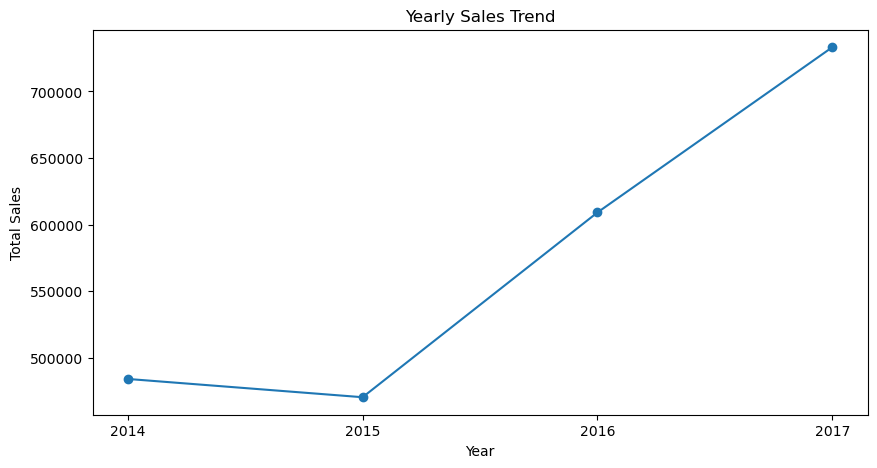

In [101]:


  #Ensure Order Date is datetime
df["Order Date"] =Convert_datetime()

  #Aggregate sales year-wise
yearly_sales = (
    df.groupby(df["Order Date"].dt.year)["Sales"]
      .sum()
      .sort_index()
)

  #Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(yearly_sales.index, yearly_sales.values, marker="o")

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Trend")
plt.xticks(yearly_sales.index)

plt.show()


#  Reccomendations


  1. Control over-discounting
  Analysis shows that profit margins turn negative once discounts exceed 30%.
  Recommendation:
  - Cap discounts at 20–25% for most categories.
  - Require approval for discounts above 30%, especially in low-margin products.

  2. Focus on high-margin categories
  Technology category generates the highest revenue and maintains strong profit margins.
  Recommendation:
  - Increase marketing focus on Technology products.
  - Bundle high-margin items with low-margin products to improve overall profitability.

  3. Improve performance in loss-making regions
  Central region shows consistent losses despite reasonable sales volume.
  Recommendation:
  - Review pricing, shipping, and discount strategies in Central region.
  - Run controlled pilot pricing experiments before offering deep discounts.

  4. Prioritize profitable customers, not just high-sales customers
  Some top sales customers show lower profit margins due to heavy discounting.
  Recommendation:
  - Segment customers based on both Sales and Profit Margin.
  - Offer loyalty benefits to high-margin customers instead of flat discounts.

  5. Leverage seasonal demand strategically
  Q4 consistently shows the highest sales due to holiday-driven demand.
  Recommendation:
  - Plan inventory and marketing campaigns well before Q4.
  - Use Q2 and Q3 to test pricing strategies and prepare for peak demand.

  Overall Impact:
  These actions can help reduce profit leakage, improve regional performance,
  and shift the business focus from volume-driven growth to sustainable profitability.
